# 3.1 Time series data viz

One of the things that pandas is really great for working with is **time series** data. This is data for which the index (or at least one level in the index) is composed of datetime values denoting when the data is from.

Time series data is abundant:
 - Stock market prices.
 - Data from sensors, IoT devices
 - Event streams from applications and services.
 - KPIs and performance data
 
 In pandas, we have a variety of tools for manipulating time series data, structured around having a pandas series or dataframe of data with a datetime index.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Let's load our Tesla share price data again.

In [2]:
df = pd.read_csv(
    'data/tsla_share_price.csv',
    index_col='Date', # We tell pandas to use Date as the index
    parse_dates=True, # We can tell pandas to try and automatically parse dates in index. In this case it does a good job
    dayfirst=False, # Let pandas know our csv has an American (MM/DD) date format not a european one
)

# we can check out our index to see that pandas has interpreted it correctly.
df.index

DatetimeIndex(['2016-01-04 16:00:00', '2016-01-05 16:00:00',
               '2016-01-06 16:00:00', '2016-01-07 16:00:00',
               '2016-01-08 16:00:00', '2016-01-11 16:00:00',
               '2016-01-12 16:00:00', '2016-01-13 16:00:00',
               '2016-01-14 16:00:00', '2016-01-15 16:00:00',
               ...
               '2020-07-30 16:00:00', '2020-07-31 16:00:00',
               '2020-08-03 16:00:00', '2020-08-04 16:00:00',
               '2020-08-05 16:00:00', '2020-08-06 16:00:00',
               '2020-08-07 16:00:00', '2020-08-10 16:00:00',
               '2020-08-11 16:00:00', '2020-08-12 16:00:00'],
              dtype='datetime64[ns]', name='Date', length=1161, freq=None)

## Plotting

First thing to notice is that pandas (with the help of matplotlib) does a good job of plotting time series data and adding ticks at sensible points on the x-axis.

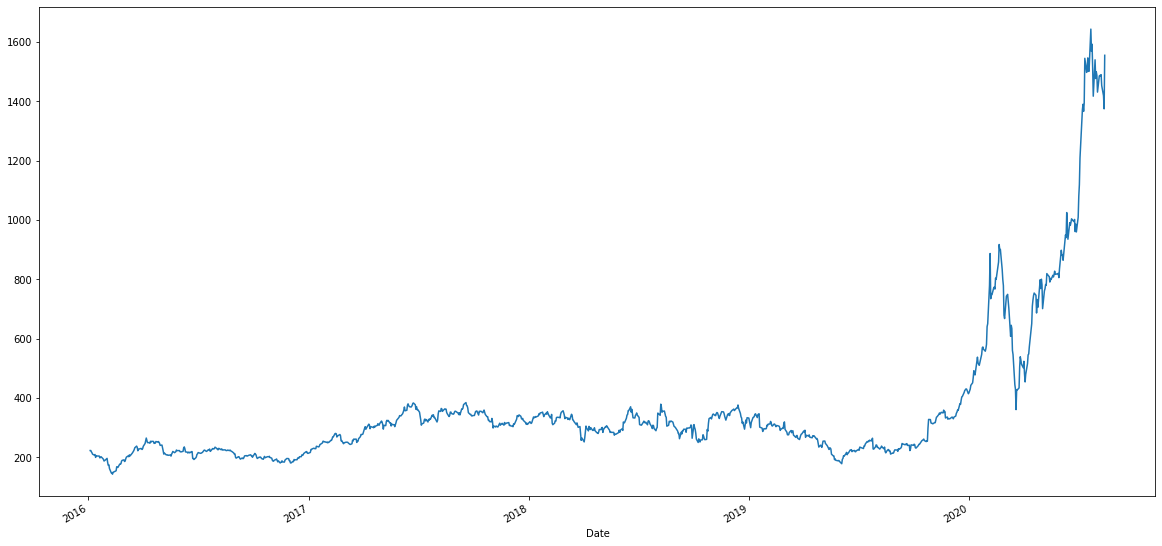

In [3]:
# Create a larger figure to plot to.
fig, ax = plt.subplots(figsize=(20,10))

df['Close'].plot()

## Resampling

Pandas also has some nice tools for aggregating data over time, for examle calculating some monthly statistics from our daily data.


In [4]:
# Here we take our data and calulate the min, max, mean and standard deviation of the price each month.


monthly_df = (
    df.resample("1M")                     # This creates a resampler object very like the gropuby object we created in the data transformation notebook.
    ['Close']                             # We select close price from the dataframe.
    .agg(["min","max","mean","std"])      # Here we tell the resampler for close price to calculate a number of different summary satstics.
)

# If we look at this data, you'll see we now have one row per month.
display(monthly_df.head())

,min,max,mean,std
Date,,,,
2016-01-31,188.07,223.43,204.562105,10.711133
2016-02-29,143.67,196.94,169.670000,16.236744
2016-03-31,186.35,238.32,216.147273,15.379885
2016-04-30,237.59,265.42,250.959048,5.750722
2016-05-31,204.66,241.80,216.633810,9.271174


Lets plot this data to see how it looks.

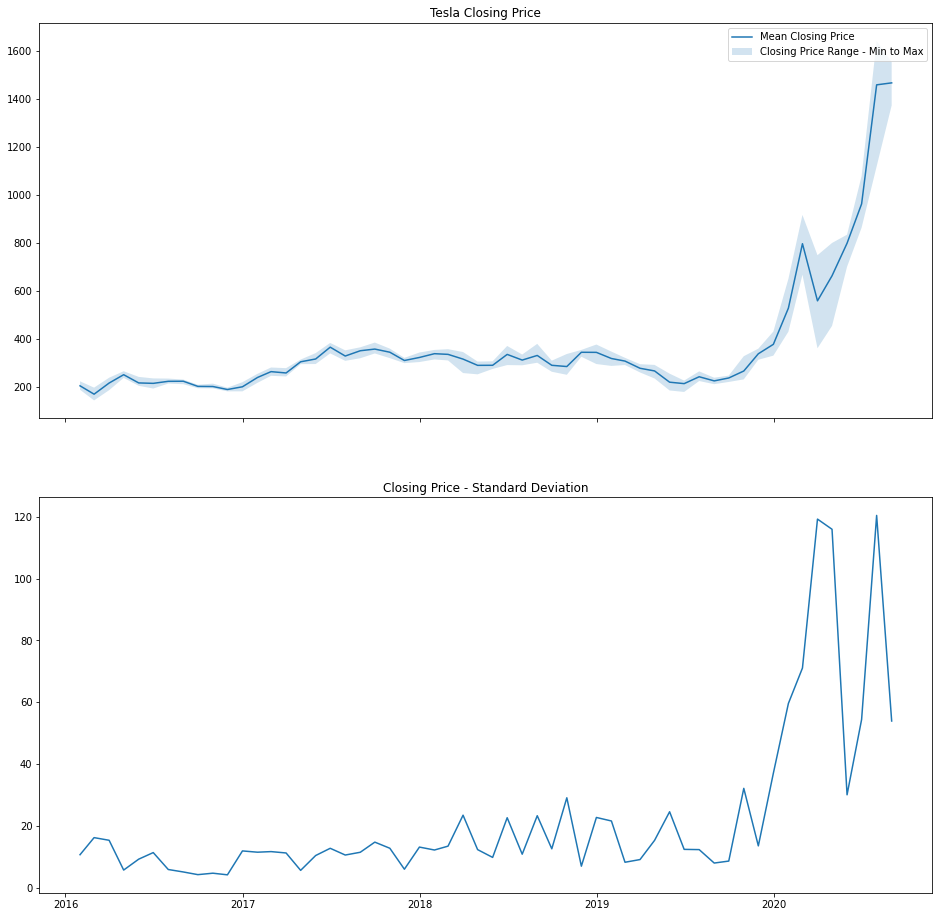

In [5]:
# We'll construct a more elaborate plot here with two subplots.
fix, axes = plt.subplots(
    nrows=2,
    ncols=1,
    sharex=True,
    figsize=(16,16)
)

# Plot the mean value and the difference between the min and max on one subplot.
axes[0].plot(
    monthly_df.index,
    monthly_df['mean'], 
    label="Mean Closing Price"
)
axes[0].fill_between(
    monthly_df.index,
    monthly_df['min'], 
    monthly_df['max'], 
    alpha=0.2, 
    label="Closing Price Range - Min to Max"
)

# Set a title for the subplot
axes[0].set_title('Tesla Closing Price')

# Add a legend using the labels we used for plotting
axes[0].legend()

# plot the standard deviation on another since the scale is different.
axes[1].plot(
    monthly_df.index, monthly_df['std'], label='Standard Deviation in Closing Price'
)

# Add a title
axes[1].set_title("Closing Price - Standard Deviation")

# show our plot
plt.show()

## Excercise

Load the example sales data from `data/sample-sales-data.csv`.
- use `ORDERNUMBER` as the index.
- parse `ORDERDATE` as a date (in American format). Hint: You can give the `parse_dates` column a list of columns with datetime data in them to try and parse them all.
- filter out *Cancelled*, *On Hold* or *Disputed* orders with the `STATUS` column
- create a summary with daily sales volumes by country with `pivot_table()`, use order date for the index, and country for the columns. Fill any nulls with zeroes.
- resample the daily summary with `resample()` to calulate quarterly sales volumes for each country
- add a column to the quartely summary for the total sales in all regions.
- plot the total sales for all regions along with the sales for the UK as a line chart.


In [41]:
# Load the data
df = pd.read_csv(
    'data/sample-sales-data.csv',
    index_col="ORDERNUMBER",
    parse_dates=["ORDERDATE"],
    dayfirst=False
)
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
ORDERNUMBER,,,,,,,,,,,,,,,,,,,,,
10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,Motorcycles,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,Motorcycles,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,Motorcycles,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,Motorcycles,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [42]:
# Filter out cancelled, on hold and disputed orders
bad_orders = df['STATUS'].isin(['Cancelled','On Hold','Disputed'])

df = df.loc[~bad_orders]
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
ORDERNUMBER,,,,,,,,,,,,,,,,,,,,,
10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,Motorcycles,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,Motorcycles,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,Motorcycles,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,Motorcycles,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [66]:
# Create daily summary by country
daily_sales = df.pivot_table(
    index='ORDERDATE',
    columns='COUNTRY',
    values="SALES",
    aggfunc='sum'
)

# We can use inplace to fill nulls in our dataframe in place rather than returning a new data frame.
daily_sales.fillna(0, inplace=True)

daily_sales

COUNTRY,Australia,Austria,Belgium,Canada,Denmark,Finland,France,Germany,Ireland,Italy,Japan,Norway,Philippines,Singapore,Spain,Sweden,Switzerland,UK,USA
ORDERDATE,,,,,,,,,,,,,,,,,,,
2003-01-06,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,12133.25
2003-01-09,0.00,0.0,0.00,0.0,0.0,0.0,0.00,11432.34,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00
2003-01-10,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,6864.05
2003-01-29,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,54702.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00
2003-01-31,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,44621.96,0.0,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-05-10,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,41509.94,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00
2005-05-17,0.00,59475.1,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00
2005-05-29,43971.43,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,7261.75


In [67]:
# Resample to quarterly sales.
quarterly_sales = daily_sales.resample("Q").sum()
quarterly_sales

COUNTRY,Australia,Austria,Belgium,Canada,Denmark,Finland,France,Germany,Ireland,Italy,Japan,Norway,Philippines,Singapore,Spain,Sweden,Switzerland,UK,USA
ORDERDATE,,,,,,,,,,,,,,,,,,,
2003-03-31,0.00,0.00,0.00,0.00,58871.11,0.00,0.00,11432.34,0.00,56181.32,0.00,54702.00,55245.02,0.00,44621.96,9749.00,0.00,51017.92,103274.02
2003-06-30,60135.84,38629.14,1711.26,0.00,0.00,0.00,126231.51,0.00,0.00,0.00,0.00,0.00,0.00,43657.47,104908.23,0.00,0.00,32376.29,154715.48
2003-09-30,86229.31,0.00,1637.20,0.00,0.00,69071.01,58022.28,0.00,0.00,0.00,0.00,0.00,0.00,44219.36,47727.82,0.00,0.00,0.00,342607.56
2003-12-31,106769.30,43488.74,0.00,54609.50,40321.61,42083.50,128507.63,58620.97,0.00,84747.45,0.00,141830.60,22841.96,77809.37,208085.38,0.00,0.00,97027.34,704550.82
2004-03-31,49637.57,0.00,18800.09,0.00,0.00,0.00,178449.34,37266.49,38784.47,0.00,50490.64,0.00,0.00,24219.59,105491.34,0.00,50432.55,35383.90,244774.70
2004-06-30,0.00,0.00,0.00,55867.03,36079.01,48831.63,72689.34,0.00,0.00,0.00,43043.18,0.00,0.00,45788.72,69645.39,0.00,0.00,0.00,248539.87
2004-09-30,53631.96,6693.28,47760.48,43332.35,0.00,42744.06,63484.48,34993.92,18971.96,150538.91,0.00,50508.57,0.00,46030.72,21986.27,53941.69,67281.01,0.00,407496.61
2004-12-31,129127.15,45001.11,13463.48,36576.71,84352.55,0.00,240575.54,78158.37,0.00,41696.69,55888.65,60422.53,15928.75,0.00,236411.71,39745.67,0.00,171863.95,739301.85
2005-03-31,86742.45,8775.16,16628.16,0.00,0.00,126851.71,149424.56,0.00,0.00,0.00,38191.39,0.00,0.00,4175.60,207555.19,31606.72,0.00,0.00,402041.42


In [71]:
# Add a column for total sales
quarterly_sales['Total'] = quarterly_sales.sum(axis='columns')
quarterly_sales

COUNTRY,Australia,Austria,Belgium,Canada,Denmark,Finland,France,Germany,Ireland,Italy,Japan,Norway,Philippines,Singapore,Spain,Sweden,Switzerland,UK,USA,Total
ORDERDATE,,,,,,,,,,,,,,,,,,,,
2003-03-31,0.00,0.00,0.00,0.00,58871.11,0.00,0.00,11432.34,0.00,56181.32,0.00,54702.00,55245.02,0.00,44621.96,9749.00,0.00,51017.92,103274.02,445094.69
2003-06-30,60135.84,38629.14,1711.26,0.00,0.00,0.00,126231.51,0.00,0.00,0.00,0.00,0.00,0.00,43657.47,104908.23,0.00,0.00,32376.29,154715.48,562365.22
2003-09-30,86229.31,0.00,1637.20,0.00,0.00,69071.01,58022.28,0.00,0.00,0.00,0.00,0.00,0.00,44219.36,47727.82,0.00,0.00,0.00,342607.56,649514.54
2003-12-31,106769.30,43488.74,0.00,54609.50,40321.61,42083.50,128507.63,58620.97,0.00,84747.45,0.00,141830.60,22841.96,77809.37,208085.38,0.00,0.00,97027.34,704550.82,1811294.17
2004-03-31,49637.57,0.00,18800.09,0.00,0.00,0.00,178449.34,37266.49,38784.47,0.00,50490.64,0.00,0.00,24219.59,105491.34,0.00,50432.55,35383.90,244774.70,833730.68
2004-06-30,0.00,0.00,0.00,55867.03,36079.01,48831.63,72689.34,0.00,0.00,0.00,43043.18,0.00,0.00,45788.72,69645.39,0.00,0.00,0.00,248539.87,620484.17
2004-09-30,53631.96,6693.28,47760.48,43332.35,0.00,42744.06,63484.48,34993.92,18971.96,150538.91,0.00,50508.57,0.00,46030.72,21986.27,53941.69,67281.01,0.00,407496.61,1109396.27
2004-12-31,129127.15,45001.11,13463.48,36576.71,84352.55,0.00,240575.54,78158.37,0.00,41696.69,55888.65,60422.53,15928.75,0.00,236411.71,39745.67,0.00,171863.95,739301.85,1988514.71
2005-03-31,86742.45,8775.16,16628.16,0.00,0.00,126851.71,149424.56,0.00,0.00,0.00,38191.39,0.00,0.00,4175.60,207555.19,31606.72,0.00,0.00,402041.42,1071992.36


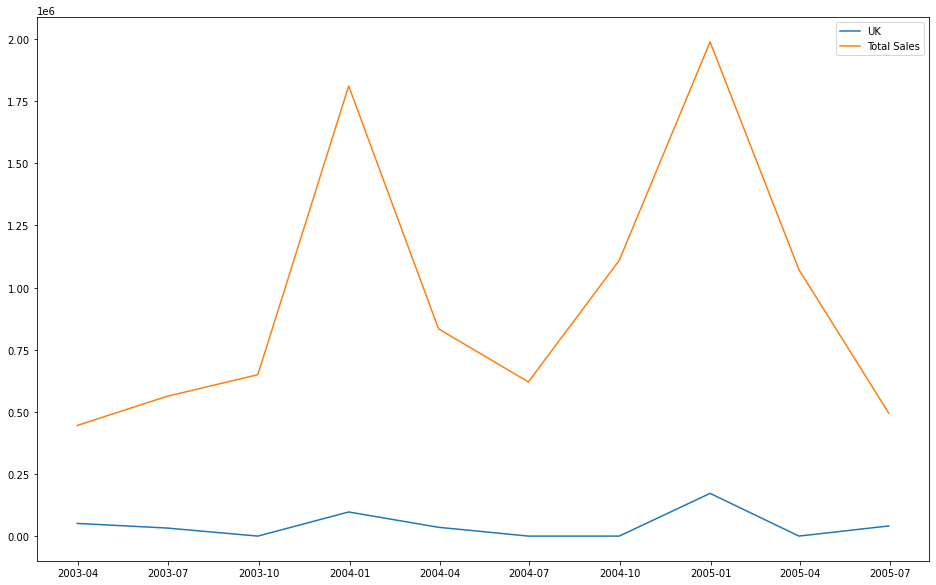

In [81]:
fig, ax = plt.subplots(figsize=(16,10))

ax.plot(quarterly_sales.index, quarterly_sales['UK'], label="UK")
ax.plot(quarterly_sales.index, quarterly_sales['Total'], label="Total Sales")
ax.legend()


plt.show()